In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import models,layers,optimizers,losses,metrics

In [4]:
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [5]:
def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence]=1
    return results

In [6]:
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [7]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [8]:
model = models.Sequential()

In [9]:
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.add(layers.Dense(16, activation='relu'))

In [11]:
model.add(layers.Dense(1,activation='sigmoid'))

In [12]:
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.001),
    loss = losses.binary_crossentropy,
    metrics = [metrics.binary_accuracy]
)

In [13]:
x_val = x_train[:10000]
partial_x_val = x_train[10000:]
y_val = y_train[:10000]
partial_y_val = y_train[10000:]

In [14]:
history = model.fit(
    partial_x_val,
    partial_y_val,
    epochs = 20,
    batch_size = 512,
    validation_data = (x_val,y_val),
    verbose=1
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 138ms/step - binary_accuracy: 0.6951 - loss: 0.5951 - val_binary_accuracy: 0.8303 - val_loss: 0.4267
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - binary_accuracy: 0.8890 - loss: 0.3470 - val_binary_accuracy: 0.8652 - val_loss: 0.3366
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - binary_accuracy: 0.9184 - loss: 0.2529 - val_binary_accuracy: 0.8438 - val_loss: 0.3634
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - binary_accuracy: 0.9294 - loss: 0.2090 - val_binary_accuracy: 0.8841 - val_loss: 0.2851
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - binary_accuracy: 0.9478 - loss: 0.1653 - val_binary_accuracy: 0.8869 - val_loss: 0.2782
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - binary_accuracy: 0.9571 - loss: 0.1378 - val_binary_accuracy: 0.8745 - val_loss: 0.3181
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - binary_accuracy: 0.9649 - loss: 0.1171 - val_binary_accuracy: 0.8781 - val_loss: 0.3252
Epoch 8/20
3

In [23]:
history_dict = history.history
history_dict.keys()

dict_keys(['binary_accuracy', 'loss', 'val_binary_accuracy', 'val_loss'])

In [16]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
epochs = range(1, len(loss)+1)

In [26]:
plt.figure(figsize=(12,12))

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

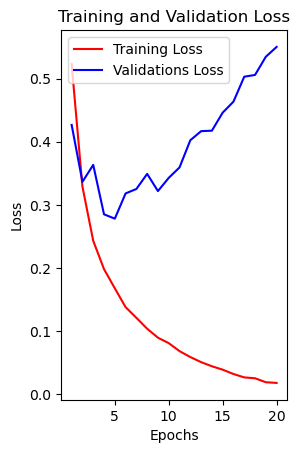

In [27]:
plt.subplot(1,2,1)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validations Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

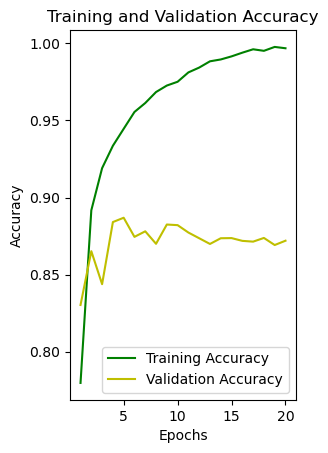

In [24]:
plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc, 'y', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [20]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>